Considere a base de dados da Vehicle.  Usando o algoritmo random forest, qual é o atributo mais importante para a classificação? Considere o código abaixo para ler e preparar os dados.

In [31]:
import random
random.seed(42) # define the seed (important to reproduce the results)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('data/Vehicle.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

 
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

# define os parâmetros do modelo
model=RandomForestClassifier(n_estimators=100, bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7705882352941177


Number of Estimators: 1 Accuracy: 0.6529411764705882
Number of Estimators: 11 Accuracy: 0.7647058823529411
Number of Estimators: 21 Accuracy: 0.7647058823529411
Number of Estimators: 31 Accuracy: 0.7941176470588235
Number of Estimators: 41 Accuracy: 0.7588235294117647
Number of Estimators: 51 Accuracy: 0.7352941176470589
Number of Estimators: 61 Accuracy: 0.7705882352941177
Number of Estimators: 71 Accuracy: 0.7529411764705882
Number of Estimators: 81 Accuracy: 0.7823529411764706
Number of Estimators: 91 Accuracy: 0.7470588235294118
Melhor n: 31  com acurácia: 0.7941176470588235


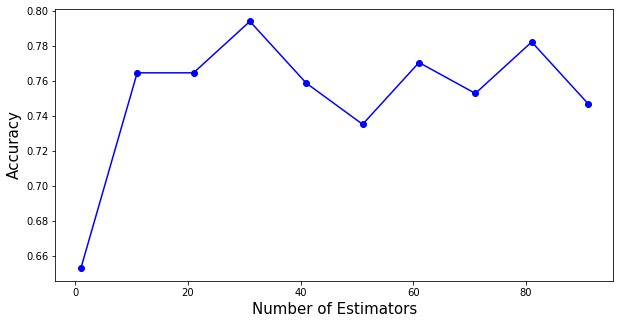

In [33]:
vscore = []
vn = []
for n in range(1,100,10):
    model = RandomForestClassifier(n_estimators=n)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    score = accuracy_score(y_pred, y_test)
    print('Number of Estimators:', n, 'Accuracy:', score)
    vscore.append(score)
    vn.append(n)
best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()

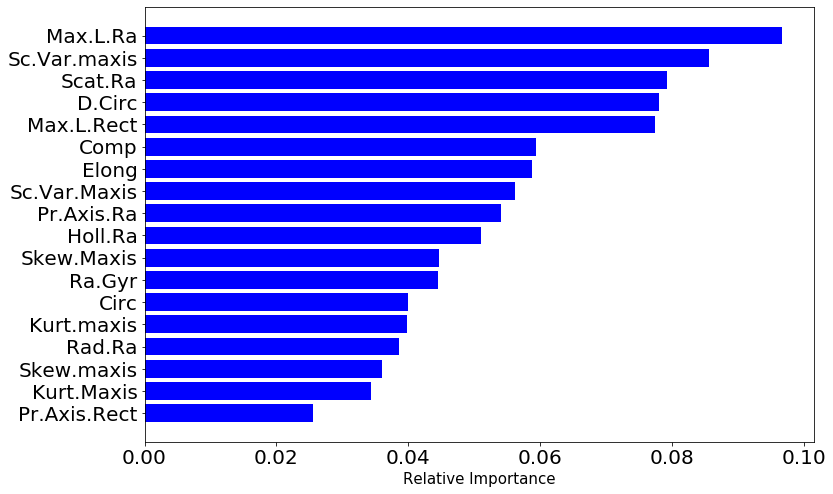

In [34]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(features_names[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()